# **1. Perkenalan Dataset**


dataset: https://data.mendeley.com/datasets/h3cgnj8hft/1

### **Penjelasan Dataset**

Dataset yang digunakan pada proyek ini berisi data URL website yang telah dilabeli sebagai phishing maupun legitimate. Setiap baris merepresentasikan satu URL website, sedangkan setiap kolom menggambarkan karakteristik URL maupun halaman web tersebut (struktur URL, domain, form, hyperlink, dan perilaku halaman).

1. Label Kelas (`CLASS_LABEL`)

    Kolom CLASS_LABEL merupakan target yang ingin diprediksi:

    0 → URL aman (legitimate)

    1 → URL phishing

    Tujuan pemodelan adalah membangun model machine learning yang dapat memprediksi nilai Status_Phishing berdasarkan fitur-fitur lain.


# **2. Import Library**

Pada tahap ini, Saya mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [158]:
!pip install gdown
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from pathlib import Path

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os
import joblib

# **3. Memuat Dataset**

In [159]:
FILE_ID = "1flLI9QLKRF_TVRD1zkkBYbJr2WEwrCyh"
url = f"https://drive.google.com/uc?id={FILE_ID}"
output_file = "phishing_dataset.arff"

gdown.download(url, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1flLI9QLKRF_TVRD1zkkBYbJr2WEwrCyh
To: /content/phishing_dataset.arff
100%|██████████| 1.37M/1.37M [00:00<00:00, 110MB/s]


'phishing_dataset.arff'

In [160]:
data, meta = arff.loadarff(output_file)
df = pd.DataFrame(data)

In [161]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3.0,1.0,5.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,b'1'
1,3.0,1.0,3.0,144.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,b'1'
2,3.0,1.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,-1.0,0.0,b'1'
3,3.0,1.0,6.0,79.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,-1.0,b'1'
4,3.0,0.0,4.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,b'1'


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  float64
 1   SubdomainLevel                      10000 non-null  float64
 2   PathLevel                           10000 non-null  float64
 3   UrlLength                           10000 non-null  float64
 4   NumDash                             10000 non-null  float64
 5   NumDashInHostname                   10000 non-null  float64
 6   AtSymbol                            10000 non-null  float64
 7   TildeSymbol                         10000 non-null  float64
 8   NumUnderscore                       10000 non-null  float64
 9   NumPercent                          10000 non-null  float64
 10  NumQueryComponents                  10000 non-null  float64
 11  NumAmpersand                        10000 

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Saya akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [163]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
df.isna().sum()

,0
NumDots,0
SubdomainLevel,0
PathLevel,0
UrlLength,0
NumDash,0
NumDashInHostname,0
AtSymbol,0
TildeSymbol,0
NumUnderscore,0
NumPercent,0


In [165]:
df.duplicated().sum()

np.int64(419)

In [166]:
kolom_binary = []
kolom_numerik = []

for col in df.columns:
    if col == 'CLASS_LABEL': continue

    jumlah_unik = df[col].nunique()

    if jumlah_unik <= 2:
        kolom_binary.append(col)
    else:
        kolom_numerik.append(col)

print(f"Ditemukan {len(kolom_binary)} Fitur Binary")
print(f"Ditemukan {len(kolom_numerik)} Fitur Numerik")

print("DAFTAR FITUR NUMERI:")
print(kolom_numerik)

Ditemukan 24 Fitur Binary
Ditemukan 24 Fitur Numerik
DAFTAR FITUR NUMERI:
['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumNumericChars', 'HostnameLength', 'PathLength', 'QueryLength', 'NumSensitiveWords', 'PctExtHyperlinks', 'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT']


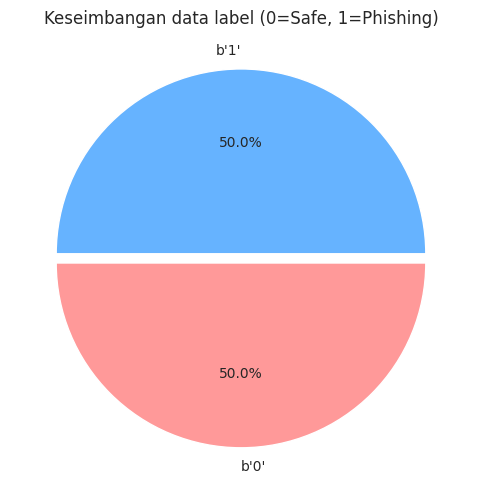

In [167]:
#cek distribusi data label
sns.set_style("whitegrid")

plt.figure(figsize=(6, 6))
df['CLASS_LABEL'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], explode=(0.05, 0))
plt.title("Keseimbangan data label (0=Safe, 1=Phishing)")
plt.ylabel('')
plt.show()

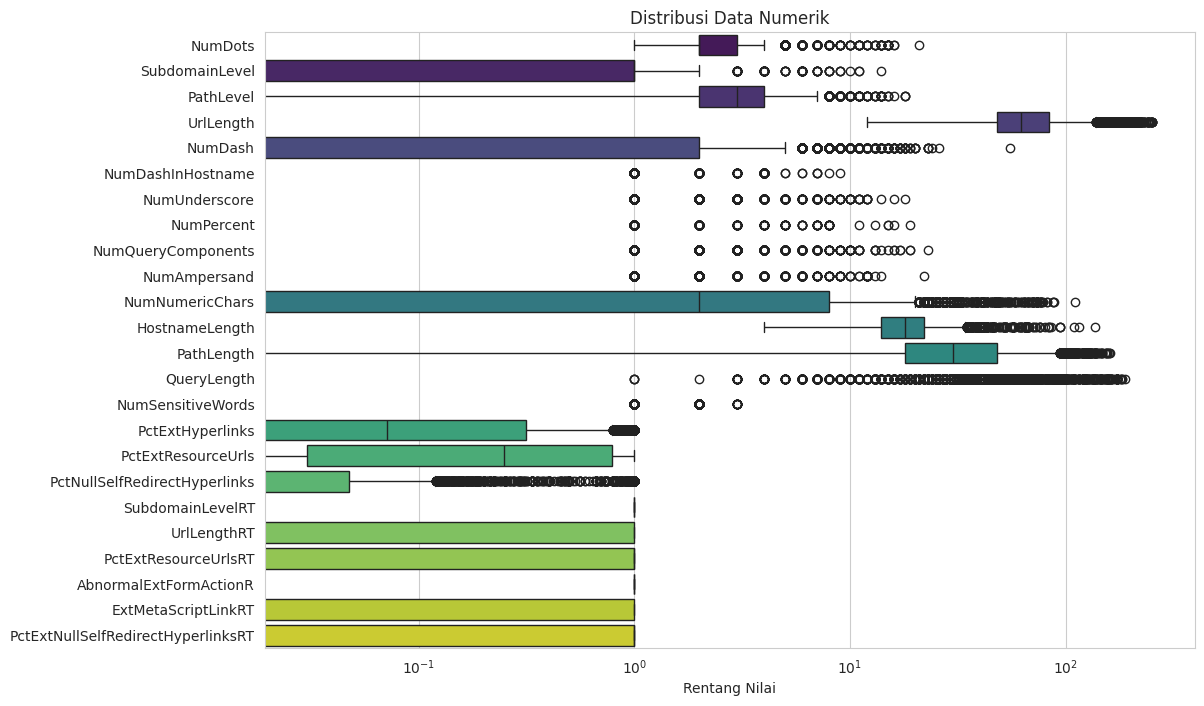

In [168]:
plt.figure(figsize=(12, 8))
df_numerik_auto = df[kolom_numerik]

sns.boxplot(data=df_numerik_auto, orient='h', palette="viridis")
plt.title("Distribusi Data Numerik")
plt.xlabel("Rentang Nilai")
plt.xscale('log')
plt.show()

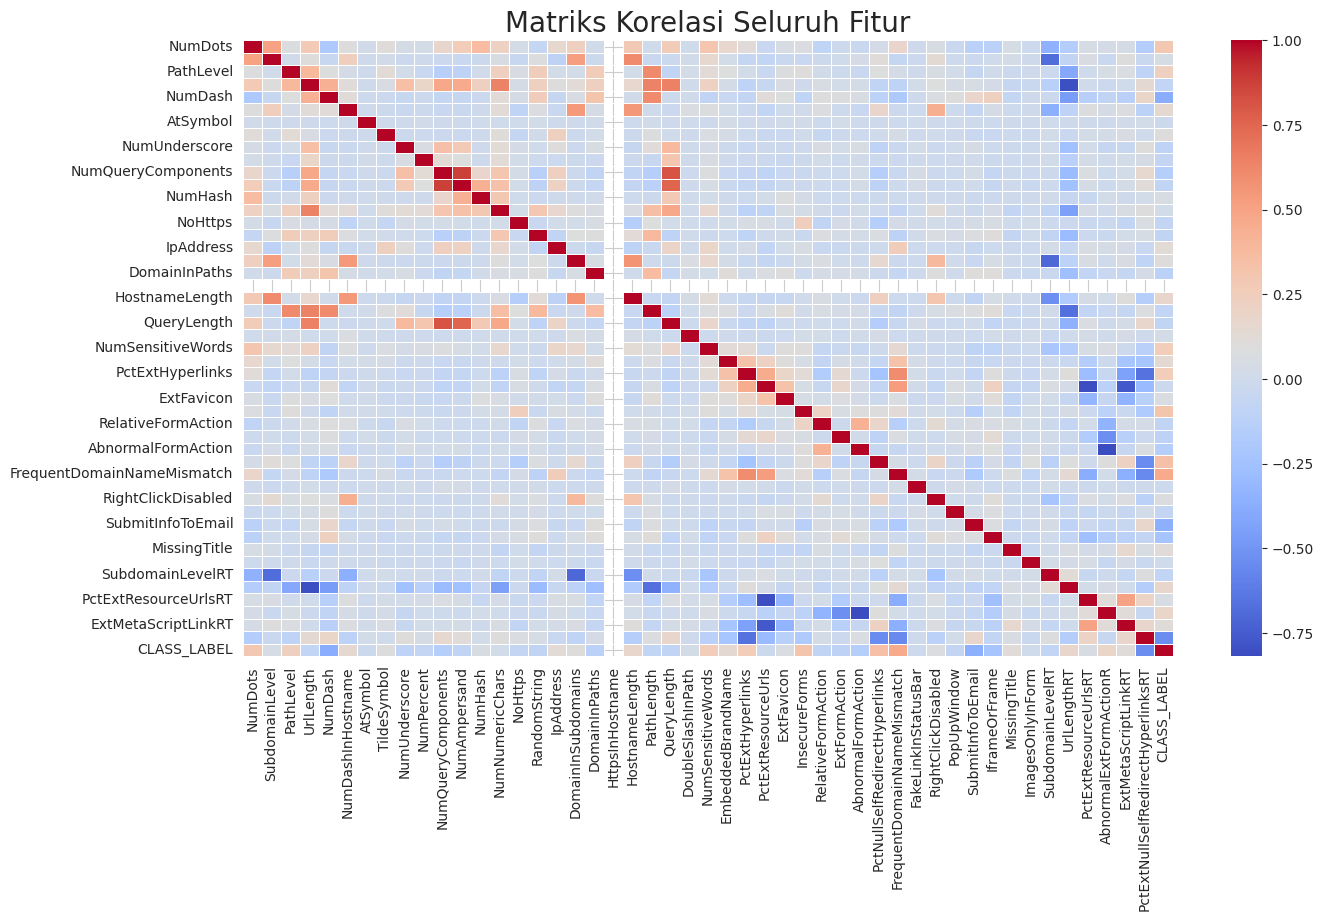

DAFTAR FITUR TERINDIKASI MULTIKOLINEARITAS(Korelasi > 0.8)
NumQueryComponents  <-->  NumAmpersand  (Skor: 0.87)
NumQueryComponents  <-->  QueryLength  (Skor: 0.81)
UrlLength  <-->  UrlLengthRT  (Skor: -0.80)
PctExtResourceUrls  <-->  PctExtResourceUrlsRT  (Skor: -0.80)
AbnormalFormAction  <-->  AbnormalExtFormActionR  (Skor: -0.82)


In [169]:
plt.figure(figsize=(15, 8))

matrix_korelasi = df.corr()
sns.heatmap(matrix_korelasi, cmap='coolwarm', annot=False, linewidths=0.5)

plt.title("Matriks Korelasi Seluruh Fitur", fontsize=20)
plt.show()

print("DAFTAR FITUR TERINDIKASI MULTIKOLINEARITAS(Korelasi > 0.8)")

upper_tri = matrix_korelasi.where(np.triu(np.ones(matrix_korelasi.shape), k=1).astype(bool))

# Cari kolom yang korelasinya > 0.80
pasangan_kembar = []
for column in upper_tri.columns:
    for index in upper_tri.index:
        nilai = upper_tri.loc[index, column]
        if abs(nilai) > 0.80:
            pasangan_kembar.append(f"{index}  <-->  {column}  (Skor: {nilai:.2f})")

if not pasangan_kembar:
    print("Hebat! Tidak ditemukan multikolinearitas parah.")
else:
    for p in pasangan_kembar:
        print(p)

# **5. Data Preprocessing**

In [170]:
# UBAH label dari byte string ke integer
df['CLASS_LABEL'] = (
    df['CLASS_LABEL']
    .str.decode('utf-8')
    .astype(int)
)

In [171]:
# Menghapus fitur yang terindikasi multikolinearitas dan fitur skor
threshold = 0.80
to_drop_multi = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]

to_drop_skor = [c for c in df.columns if c.endswith('RT')]

cols_to_drop = list(set(to_drop_multi + to_drop_skor))
df_final = df.drop(columns=cols_to_drop)

print(f"Fitur yang dihapus: {cols_to_drop}")
print(f"Sisa kolom: {df_final.shape[1]}")

Fitur yang dihapus: ['NumAmpersand', 'SubdomainLevelRT', 'ExtMetaScriptLinkRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'PctExtNullSelfRedirectHyperlinksRT', 'QueryLength', 'AbnormalExtFormActionR']
Sisa kolom: 41


In [172]:
df_final = df_final.drop_duplicates().reset_index(drop=True)

In [173]:
kolom_binary2 = []
kolom_numerik2 = []

for col in df_final.columns:
    if col == 'CLASS_LABEL': continue

    jumlah_unik = df_final[col].nunique()

    if jumlah_unik <= 2:
        kolom_binary2.append(col)
    else:
        kolom_numerik2.append(col)

print(f"Ditemukan {len(kolom_binary2)} Fitur Binary")
print(f"Ditemukan {len(kolom_numerik2)} Fitur Numerik")

print("DAFTAR FITUR NUMERIK:")
print(kolom_numerik2)

Ditemukan 24 Fitur Binary
Ditemukan 16 Fitur Numerik
DAFTAR FITUR NUMERIK:
['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumNumericChars', 'HostnameLength', 'PathLength', 'NumSensitiveWords', 'PctExtHyperlinks', 'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks']


In [174]:
# split data
X = df_final.drop('CLASS_LABEL', axis=1)
y = df_final['CLASS_LABEL'].replace(-1, 0)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

In [175]:
#standarisasi
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), kolom_numerik2),
        ('bin', 'passthrough', kolom_binary2)
    ]
)

X_train_p = preprocess.fit_transform(X_train)
X_val_p   = preprocess.transform(X_val)
X_test_p  = preprocess.transform(X_test)

In [176]:
feature_names = kolom_numerik2 + kolom_binary2
X_train_p = pd.DataFrame(X_train_p, columns=feature_names)
X_val_p   = pd.DataFrame(X_val_p,   columns=feature_names)
X_test_p  = pd.DataFrame(X_test_p,  columns=feature_names)

train_df = X_train_p.copy()
train_df['CLASS_LABEL'] = y_train.values

val_df = X_val_p.copy()
val_df['CLASS_LABEL'] = y_val.values

test_df = X_test_p.copy()
test_df['CLASS_LABEL'] = y_test.values

In [177]:
os.makedirs("namadataset_preprocessing", exist_ok=True)
train_df.to_csv("namadataset_preprocessing/train.csv", index=False)
test_df.to_csv("namadataset_preprocessing/test.csv", index=False)
val_df.to_csv("namadataset_preprocessing/val.csv", index=False)

train_df.shape, test_df.shape, val_df.shape

((6706, 41), (1438, 41), (1437, 41))